In [16]:
# ============================================================================
# DATASET CHARACTERISTICS ANALYSIS - ROOM 7 BAKERY SALES PREDICTION
# ============================================================================
# Cell 1: Setup, Data Loading, and Dataset Overview
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("DATASET CHARACTERISTICS ANALYSIS - ROOM 7")
print("Bakery Sales Prediction - Time Series Analysis")
print("=" * 70)

# ============================================================================
# DATA LOADING
# ============================================================================

print("\n" + "=" * 70)
print("DATA LOADING")
print("=" * 70)

# Loading data
try:
    train = pd.read_csv('train_prepared.csv')
    test = pd.read_csv('test_prepared.csv')
    print("\nData loaded successfully!")
except FileNotFoundError:
    print("\n Error: Files not found in current directory")
    print("Current working directory:", os.getcwd())
    print("\nTrying alternative paths...")
    try:
        train = pd.read_csv('data/train_prepared.csv')
        test = pd.read_csv('data/test_prepared.csv')
        print(" Data loaded from 'data/' folder")
    except:
        print(" Files not found. Please check file location.")
        # List available CSV files
        import glob
        print("\nAvailable CSV files in current directory:")
        print(glob.glob('*.csv'))

# Convert date column if exists
if 'Datum' in train.columns:
    train['Datum'] = pd.to_datetime(train['Datum'])
    test['Datum'] = pd.to_datetime(test['Datum'])
    print("Date columns converted to datetime")

# ============================================================================
# DATASET OVERVIEW
# ============================================================================

print("\n" + "=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)

print("\n DATASET DIMENSIONS:")
print("-" * 70)
print(f"Training Set: {train.shape[0]:,} rows × {train.shape[1]} columns")
print(f"Test Set:     {test.shape[0]:,} rows × {test.shape[1]} columns")
print(f"Total Data:   {train.shape[0] + test.shape[0]:,} rows")

print("\n TIME PERIOD:")
print("-" * 70)
if 'Datum' in train.columns:
    print(f"Training Period: {train['Datum'].min().strftime('%Y-%m-%d')} to {train['Datum'].max().strftime('%Y-%m-%d')}")
    print(f"Duration: {(train['Datum'].max() - train['Datum'].min()).days} days ({(train['Datum'].max() - train['Datum'].min()).days/365:.1f} years)")
    if 'Datum' in test.columns:
        print(f"Test Period: {test['Datum'].min().strftime('%Y-%m-%d')} to {test['Datum'].max().strftime('%Y-%m-%d')}")
        print(f"Duration: {(test['Datum'].max() - test['Datum'].min()).days} days")

print("\n PRODUCT CATEGORIES:")
print("-" * 70)
if 'Warengruppe' in train.columns:
    product_mapping = {
        1: 'Bread',
        2: 'Rolls',
        3: 'Croissants',
        4: 'Confectionery',
        5: 'Cakes',
        6: 'Seasonal Bread'
    }
    products = sorted(train['Warengruppe'].unique())
    for prod in products:
        count = len(train[train['Warengruppe'] == prod])
        prod_name = product_mapping.get(prod, f'Product {prod}')
        print(f"  {prod}. {prod_name:<20} : {count:,} records")

print("\n TARGET VARIABLE (Umsatz/Sales):")
print("-" * 70)
if 'Umsatz' in train.columns:
    print(f"Total Sales:    €{train['Umsatz'].sum():,.2f}")
    print(f"Average Sale:   €{train['Umsatz'].mean():,.2f}")
    print(f"Median Sale:    €{train['Umsatz'].median():,.2f}")
    print(f"Min Sale:       €{train['Umsatz'].min():,.2f}")
    print(f"Max Sale:       €{train['Umsatz'].max():,.2f}")
    print(f"Std Deviation:  €{train['Umsatz'].std():,.2f}")

print("\n FEATURE CATEGORIES:")
print("-" * 70)
feature_types = {
    'Temporal': [],
    'Weather': [],
    'Event': [],
    'Engineered': [],
    'Target': [],
    'Other': []
}

for col in train.columns:
    if col in ['Datum', 'year', 'month', 'day', 'dayofweek', 'Wochentag', 'is_weekend', 'quarter', 'week']:
        feature_types['Temporal'].append(col)
    elif col in ['Temperatur', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode']:
        feature_types['Weather'].append(col)
    elif col in ['KielerWoche', 'Feiertag', 'Ferien']:
        feature_types['Event'].append(col)
    elif col in ['Umsatz_MA7', 'Umsatz_Lag1', 'Umsatz_PctChange', 'Umsatz_Rolling_Std']:
        feature_types['Engineered'].append(col)
    elif col in ['Umsatz']:
        feature_types['Target'].append(col)
    else:
        feature_types['Other'].append(col)

for category, features in feature_types.items():
    if features:
        print(f"\n{category} Features ({len(features)}):")
        for feat in features:
            dtype = str(train[feat].dtype)
            print(f"  - {feat:<25} ({dtype})")

print("\n" + "=" * 70)
print(" DATASET OVERVIEW COMPLETED")
print("=" * 70)


DATASET CHARACTERISTICS ANALYSIS - ROOM 7
Bakery Sales Prediction - Time Series Analysis

DATA LOADING

Data loaded successfully!
Date columns converted to datetime

DATASET OVERVIEW

 DATASET DIMENSIONS:
----------------------------------------------------------------------
Training Set: 7,493 rows × 16 columns
Test Set:     1,830 rows × 16 columns
Total Data:   9,323 rows

 TIME PERIOD:
----------------------------------------------------------------------
Training Period: 2013-07-01 to 2017-07-31
Duration: 1491 days (4.1 years)
Test Period: 2018-08-01 to 2019-07-30
Duration: 363 days

 PRODUCT CATEGORIES:
----------------------------------------------------------------------
  1. Bread                : 1,462 records
  2. Rolls                : 1,462 records
  3. Croissants           : 1,462 records
  4. Confectionery        : 1,409 records
  5. Cakes                : 1,462 records
  6. Seasonal Bread       : 236 records

 TARGET VARIABLE (Umsatz/Sales):
-----------------------------


2. MISSING VALUES ANALYSIS

MISSING VALUES IN TRAINING SET:
----------------------------------------------------------------------
                Column  Missing Count  Percentage
0          KielerWoche           7315   97.624449
1           Bewoelkung              6    0.080075
2           Temperatur              6    0.080075
3  Windgeschwindigkeit              6    0.080075
4           Wettercode           2094   27.946083
5           Umsatz_MA7              6    0.080075
6     Umsatz_PctChange              1    0.013346
7          Umsatz_Lag1              1    0.013346

MISSING VALUES IN TEST SET:
----------------------------------------------------------------------
                Column  Missing Count  Percentage
0               Umsatz           1830  100.000000
1          KielerWoche           1830  100.000000
2           Bewoelkung           1830  100.000000
3           Temperatur           1830  100.000000
4  Windgeschwindigkeit           1830  100.000000
5           Wetter

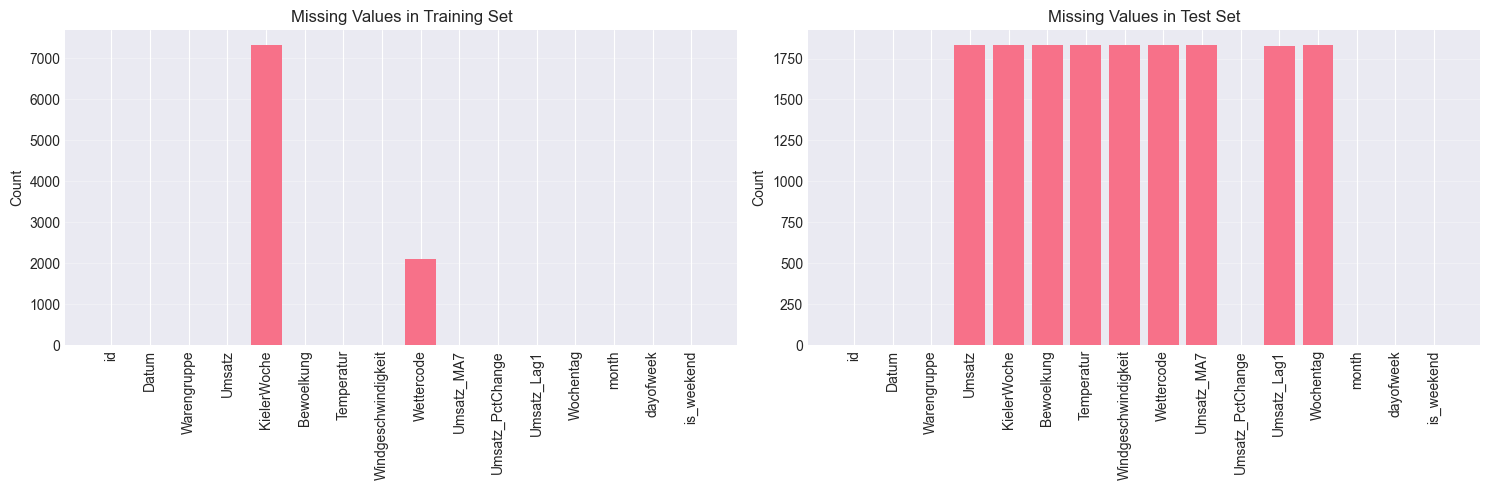


 Missing values visualization saved as 'missing_values_analysis.png'


In [17]:
# 2. MISSING VALUES ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("2. MISSING VALUES ANALYSIS")
print("=" * 70)

# Count missing values
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

print("\nMISSING VALUES IN TRAINING SET:")
print("-" * 70)
if missing_train.sum() == 0:
    print("No missing values found in training set!")
else:
    missing_df = pd.DataFrame({
        'Column': missing_train[missing_train > 0].index,
        'Missing Count': missing_train[missing_train > 0].values,
        'Percentage': (missing_train[missing_train > 0] / len(train) * 100).values
    })
    print(missing_df)
    
print("\nMISSING VALUES IN TEST SET:")
print("-" * 70)
if missing_test.sum() == 0:
    print("No missing values found in test set!")
else:
    missing_df_test = pd.DataFrame({
        'Column': missing_test[missing_test > 0].index,
        'Missing Count': missing_test[missing_test > 0].values,
        'Percentage': (missing_test[missing_test > 0] / len(test) * 100).values
    })
    print(missing_df_test)

# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].bar(range(len(missing_train)), missing_train.values)
axes[0].set_xticks(range(len(missing_train)))
axes[0].set_xticklabels(missing_train.index, rotation=90)
axes[0].set_title('Missing Values in Training Set')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)

# Test set
axes[1].bar(range(len(missing_test)), missing_test.values)
axes[1].set_xticks(range(len(missing_test)))
axes[1].set_xticklabels(missing_test.index, rotation=90)
axes[1].set_title('Missing Values in Test Set')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Missing values visualization saved as 'missing_values_analysis.png'")


3. FEATURE DISTRIBUTION ANALYSIS

TARGET VARIABLE (Umsatz) STATISTICS:
----------------------------------------------------------------------
Mean: 209.34
Median: 162.62
Std Dev: 147.77
Min: 12.94
Max: 1879.46
Skewness: 1.85
Kurtosis: 8.24


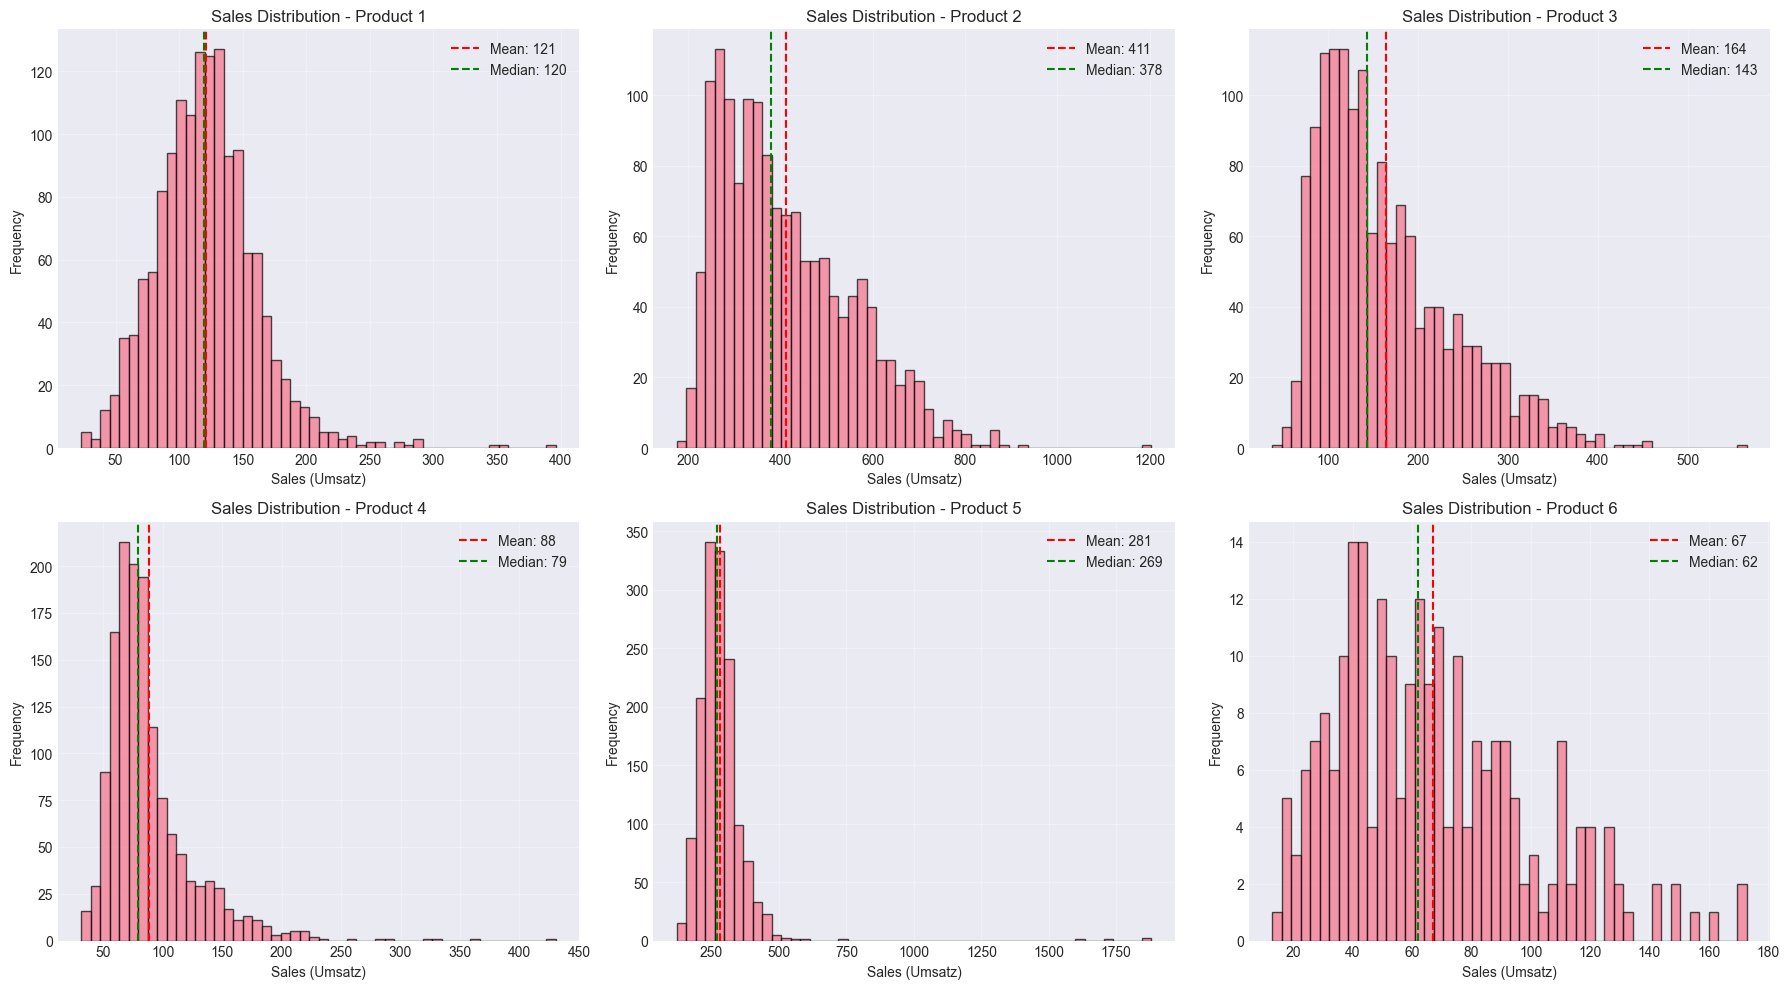


Sales distribution saved as 'sales_distribution_by_product.png'

WEATHER FEATURES DISTRIBUTION:
----------------------------------------------------------------------


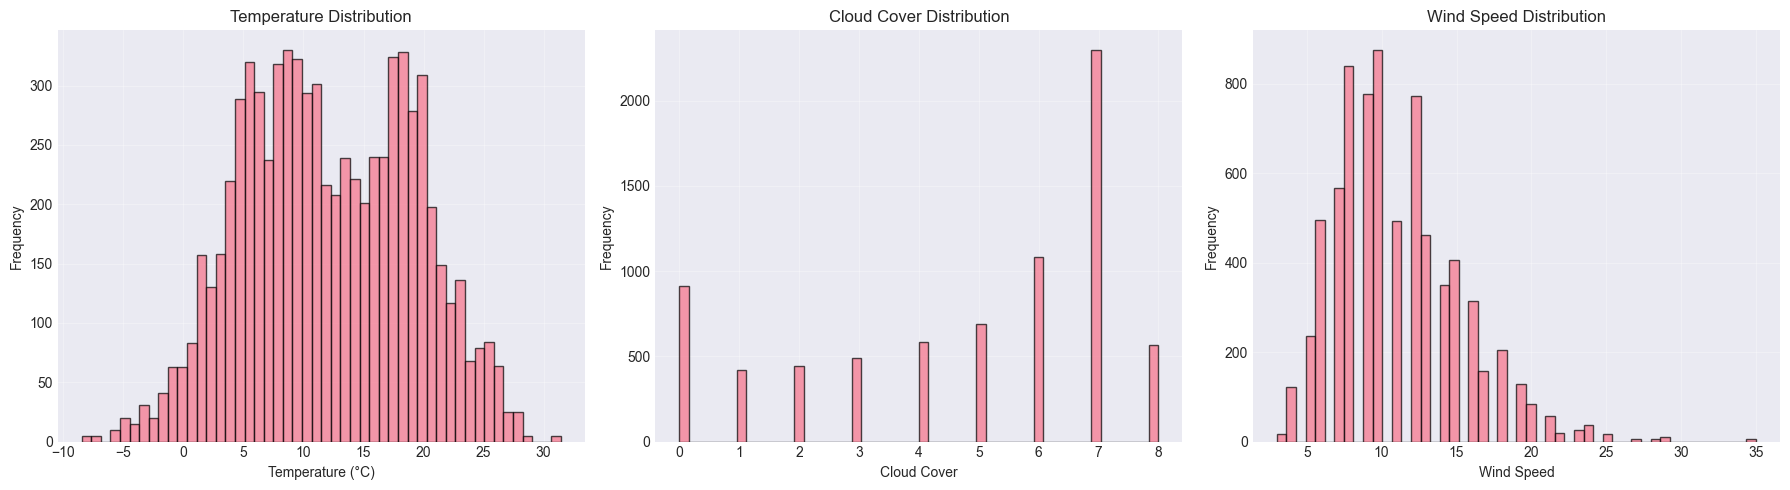

 Weather features distribution saved


In [18]:
# ============================================================================
# 3. FEATURE DISTRIBUTION ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("3. FEATURE DISTRIBUTION ANALYSIS")
print("=" * 70)

# Analyze target variable (Umsatz/Sales)
print("\nTARGET VARIABLE (Umsatz) STATISTICS:")
print("-" * 70)
print(f"Mean: {train['Umsatz'].mean():.2f}")
print(f"Median: {train['Umsatz'].median():.2f}")
print(f"Std Dev: {train['Umsatz'].std():.2f}")
print(f"Min: {train['Umsatz'].min():.2f}")
print(f"Max: {train['Umsatz'].max():.2f}")
print(f"Skewness: {train['Umsatz'].skew():.2f}")
print(f"Kurtosis: {train['Umsatz'].kurtosis():.2f}")

# Sales distribution by product
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, warengruppe in enumerate(sorted(train['Warengruppe'].unique())):
    product_data = train[train['Warengruppe'] == warengruppe]['Umsatz']
    
    axes[idx].hist(product_data, bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Sales Distribution - Product {warengruppe}')
    axes[idx].set_xlabel('Sales (Umsatz)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(product_data.mean(), color='red', linestyle='--', 
                     label=f'Mean: {product_data.mean():.0f}')
    axes[idx].axvline(product_data.median(), color='green', linestyle='--', 
                     label=f'Median: {product_data.median():.0f}')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('sales_distribution_by_product.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSales distribution saved as 'sales_distribution_by_product.png'")

# Weather features distribution
if 'Temperatur' in train.columns:
    print("\nWEATHER FEATURES DISTRIBUTION:")
    print("-" * 70)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Temperature
    axes[0].hist(train['Temperatur'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title('Temperature Distribution')
    axes[0].set_xlabel('Temperature (°C)')
    axes[0].set_ylabel('Frequency')
    axes[0].grid(alpha=0.3)
    
    # Cloud cover
    if 'Bewoelkung' in train.columns:
        axes[1].hist(train['Bewoelkung'].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[1].set_title('Cloud Cover Distribution')
        axes[1].set_xlabel('Cloud Cover')
        axes[1].set_ylabel('Frequency')
        axes[1].grid(alpha=0.3)
    
    # Wind speed
    if 'Windgeschwindigkeit' in train.columns:
        axes[2].hist(train['Windgeschwindigkeit'].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[2].set_title('Wind Speed Distribution')
        axes[2].set_xlabel('Wind Speed')
        axes[2].set_ylabel('Frequency')
        axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('weather_features_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(" Weather features distribution saved")


4. BAR CHARTS WITH CONFIDENCE INTERVALS

Creating Chart 1: Average Sales by Product...


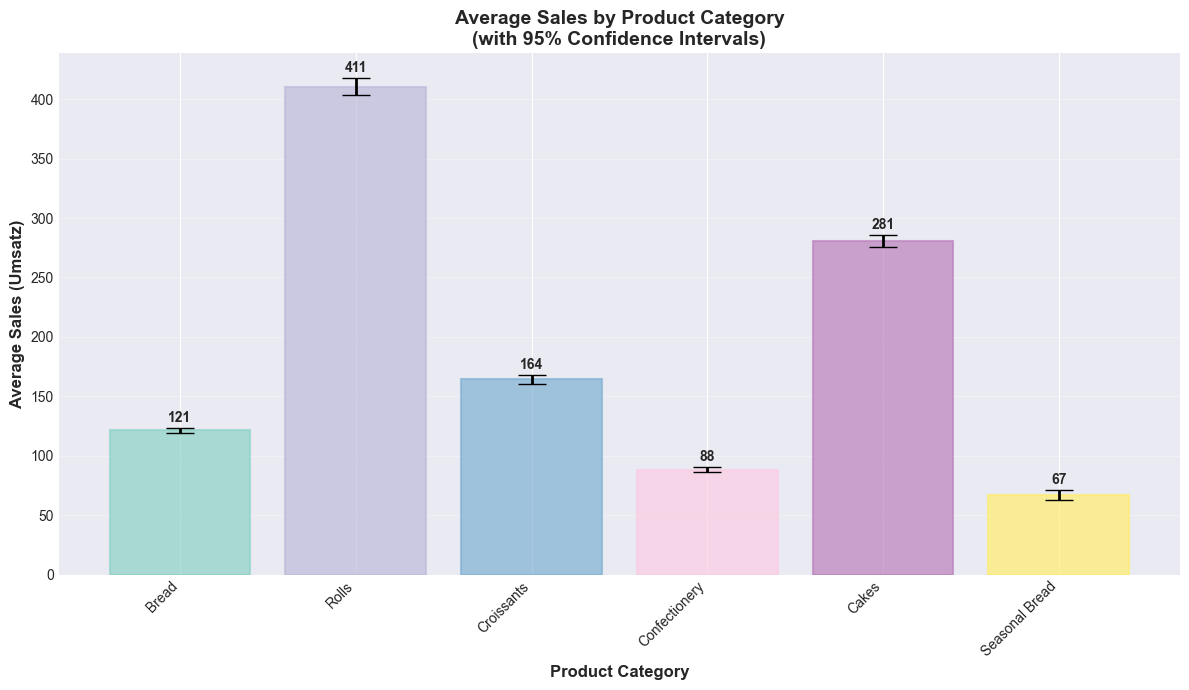

Chart 1 saved as 'sales_by_product_with_ci.png'

Creating Chart 2: Average Sales by Day of Week...


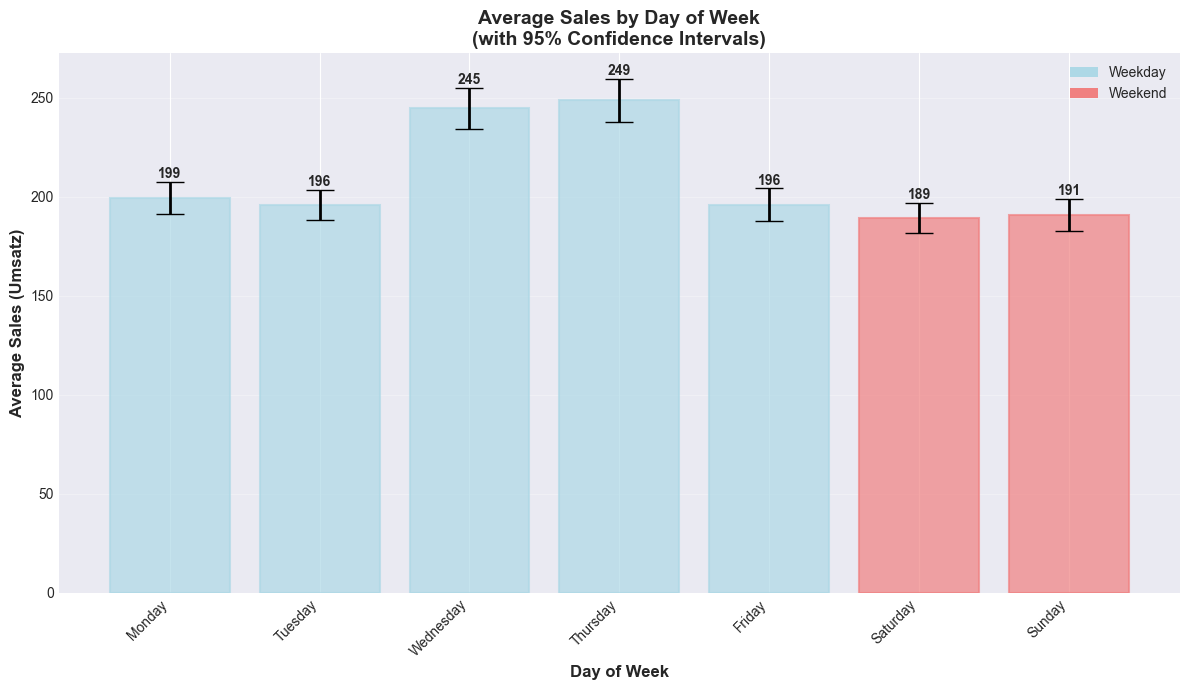

Chart 2 saved as 'sales_by_dayofweek_with_ci.png'

Creating Chart 3: Average Sales by Month...


In [19]:
# ============================================================================
# 4. BAR CHARTS WITH CONFIDENCE INTERVALS (For Presentation)
# ============================================================================

print("\n" + "=" * 70)
print("4. BAR CHARTS WITH CONFIDENCE INTERVALS")
print("=" * 70)

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = data.mean()
    stderr = stats.sem(data)
    margin = stderr * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, margin

# Chart 1: Average Sales by Product with 95% CI
print("\nCreating Chart 1: Average Sales by Product...")
products = sorted(train['Warengruppe'].unique())
means = []
errors = []
product_names = ['Bread', 'Rolls', 'Croissants', 'Confectionery', 'Cakes', 'Seasonal Bread']

for product in products:
    data = train[train['Warengruppe'] == product]['Umsatz']
    mean, margin = confidence_interval(data)
    means.append(mean)
    errors.append(margin)

fig, ax = plt.subplots(figsize=(12, 7))
x_pos = np.arange(len(products))
bars = ax.bar(x_pos, means, yerr=errors, capsize=10, alpha=0.7, 
              edgecolor='black', linewidth=1.5, error_kw={'linewidth': 2})

# Color bars differently
colors = plt.cm.Set3(np.linspace(0, 1, len(products)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xlabel('Product Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Sales (Umsatz)', fontsize=12, fontweight='bold')
ax.set_title('Average Sales by Product Category\n(with 95% Confidence Intervals)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(product_names, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (mean, error) in enumerate(zip(means, errors)):
    ax.text(i, mean + error + 5, f'{mean:.0f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('sales_by_product_with_ci.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart 1 saved as 'sales_by_product_with_ci.png'")

# Chart 2: Average Sales by Day of Week with 95% CI
print("\nCreating Chart 2: Average Sales by Day of Week...")
if 'Wochentag' in train.columns or 'dayofweek' in train.columns:
    day_col = 'Wochentag' if 'Wochentag' in train.columns else 'dayofweek'
    
    days = sorted(train[day_col].unique())
    day_means = []
    day_errors = []
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    for day in days:
        data = train[train[day_col] == day]['Umsatz']
        mean, margin = confidence_interval(data)
        day_means.append(mean)
        day_errors.append(margin)
    
    fig, ax = plt.subplots(figsize=(12, 7))
    x_pos = np.arange(len(days))
    bars = ax.bar(x_pos, day_means, yerr=day_errors, capsize=10, alpha=0.7,
                  edgecolor='black', linewidth=1.5, error_kw={'linewidth': 2})
    
    # Highlight weekends
    for i, bar in enumerate(bars):
        if i >= 5:  # Saturday, Sunday
            bar.set_color('lightcoral')
        else:
            bar.set_color('lightblue')
    
    ax.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Sales (Umsatz)', fontsize=12, fontweight='bold')
    ax.set_title('Average Sales by Day of Week\n(with 95% Confidence Intervals)', 
                 fontsize=14, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(day_names[:len(days)], rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (mean, error) in enumerate(zip(day_means, day_errors)):
        ax.text(i, mean + error + 2, f'{mean:.0f}', ha='center', fontsize=10, fontweight='bold')
    
    # Legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='lightblue', label='Weekday'),
                      Patch(facecolor='lightcoral', label='Weekend')]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.savefig('sales_by_dayofweek_with_ci.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Chart 2 saved as 'sales_by_dayofweek_with_ci.png'")

# Chart 3: Average Sales by Month with 95% CI
print("\nCreating Chart 3: Average Sales by Month...")
if 'month' in train.columns:
    months = sorted(train['month'].unique())
    month_means = []
    month_errors = []
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    for month in months:
        data = train[train['month'] == month]


5. CORRELATION ANALYSIS


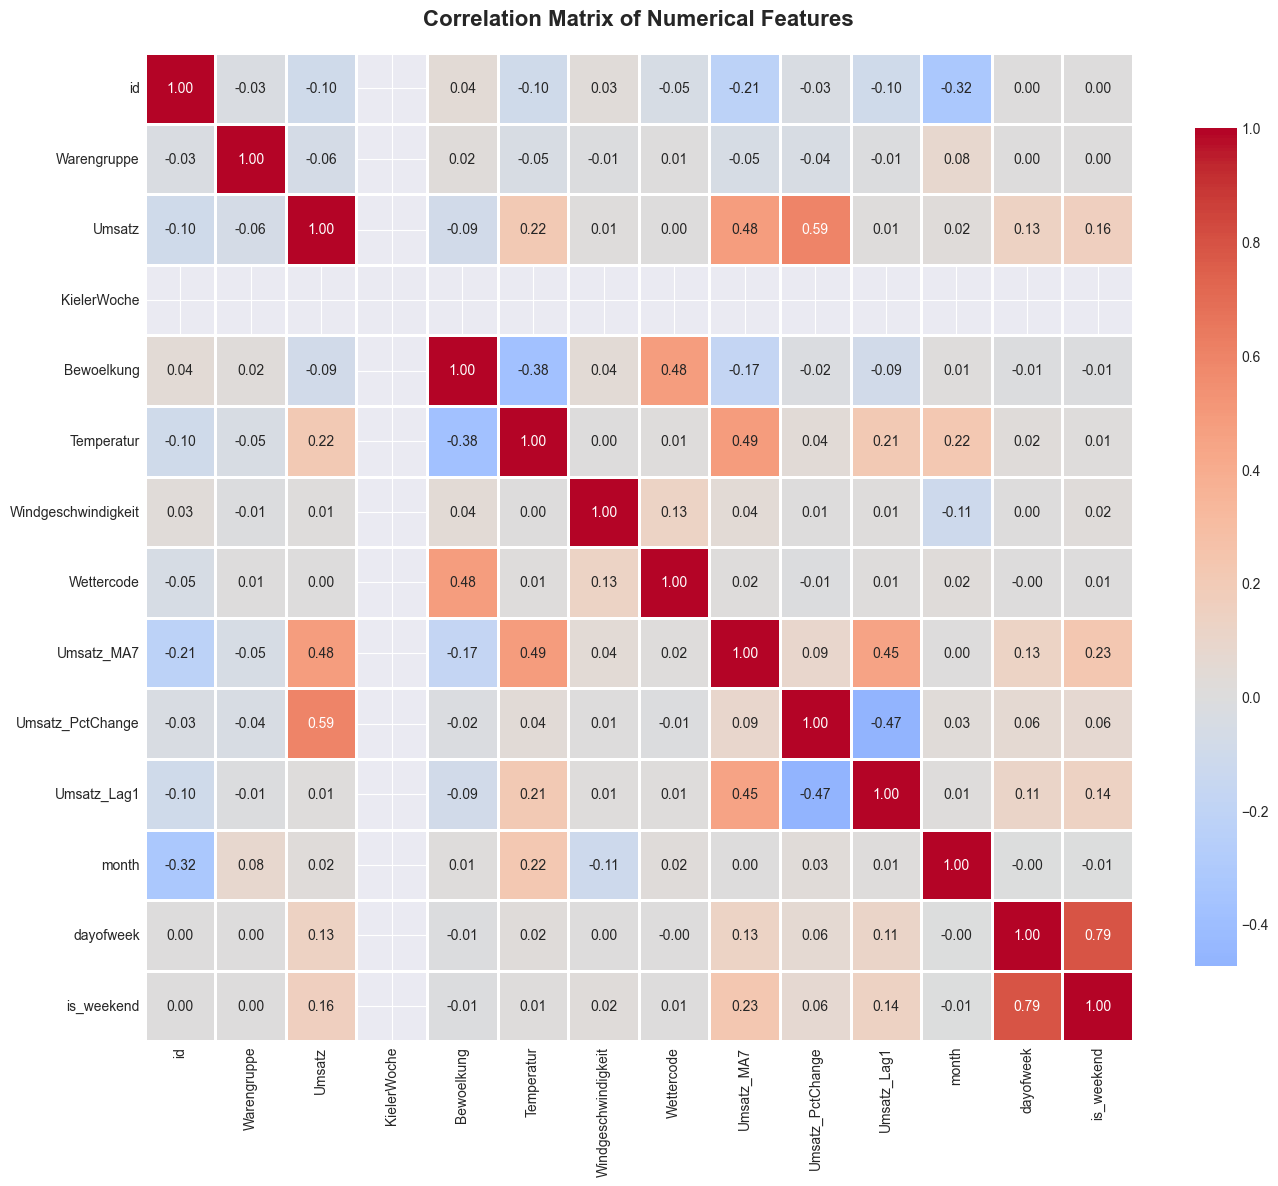

Correlation matrix saved as 'correlation_matrix.png'

Top correlations with Umsatz (Target):
----------------------------------------------------------------------
Umsatz                 1.000000
Umsatz_PctChange       0.593534
Umsatz_MA7             0.476154
Temperatur             0.216569
is_weekend             0.160518
dayofweek              0.134691
month                  0.015637
Windgeschwindigkeit    0.011454
Umsatz_Lag1            0.011262
Wettercode             0.001147
Warengruppe           -0.060014
Bewoelkung            -0.085921
id                    -0.097412
KielerWoche                 NaN
Name: Umsatz, dtype: float64


In [10]:
# ============================================================================
# 5. CORRELATION ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("5. CORRELATION ANALYSIS")
print("=" * 70)

# Select numerical features for correlation
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = train[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation matrix saved as 'correlation_matrix.png'")

# Print top correlations with target variable (Umsatz)
print("\nTop correlations with Umsatz (Target):")
print("-" * 70)
umsatz_corr = correlation_matrix['Umsatz'].sort_values(ascending=False)
print(umsatz_corr)



6. OUTLIER DETECTION & ANALYSIS

OUTLIER DETECTION SUMMARY:
----------------------------------------------------------------------
            Feature  IQR_Outliers IQR_Pct  ZScore_Outliers ZScore_Pct Lower_Bound Upper_Bound
             Umsatz           247   3.30%              101      1.35%     -183.93      564.61
         Temperatur             0   0.00%                0      0.00%      -10.19       34.66
Windgeschwindigkeit           180   2.40%               79      1.05%        0.50       20.50
         Bewoelkung             0   0.00%                0      0.00%       -3.00       13.00
         Umsatz_MA7           164   2.19%               74      0.99%       39.30      367.70
        Umsatz_Lag1           247   3.30%              101      1.35%     -183.92      564.60

Creating outlier visualizations...


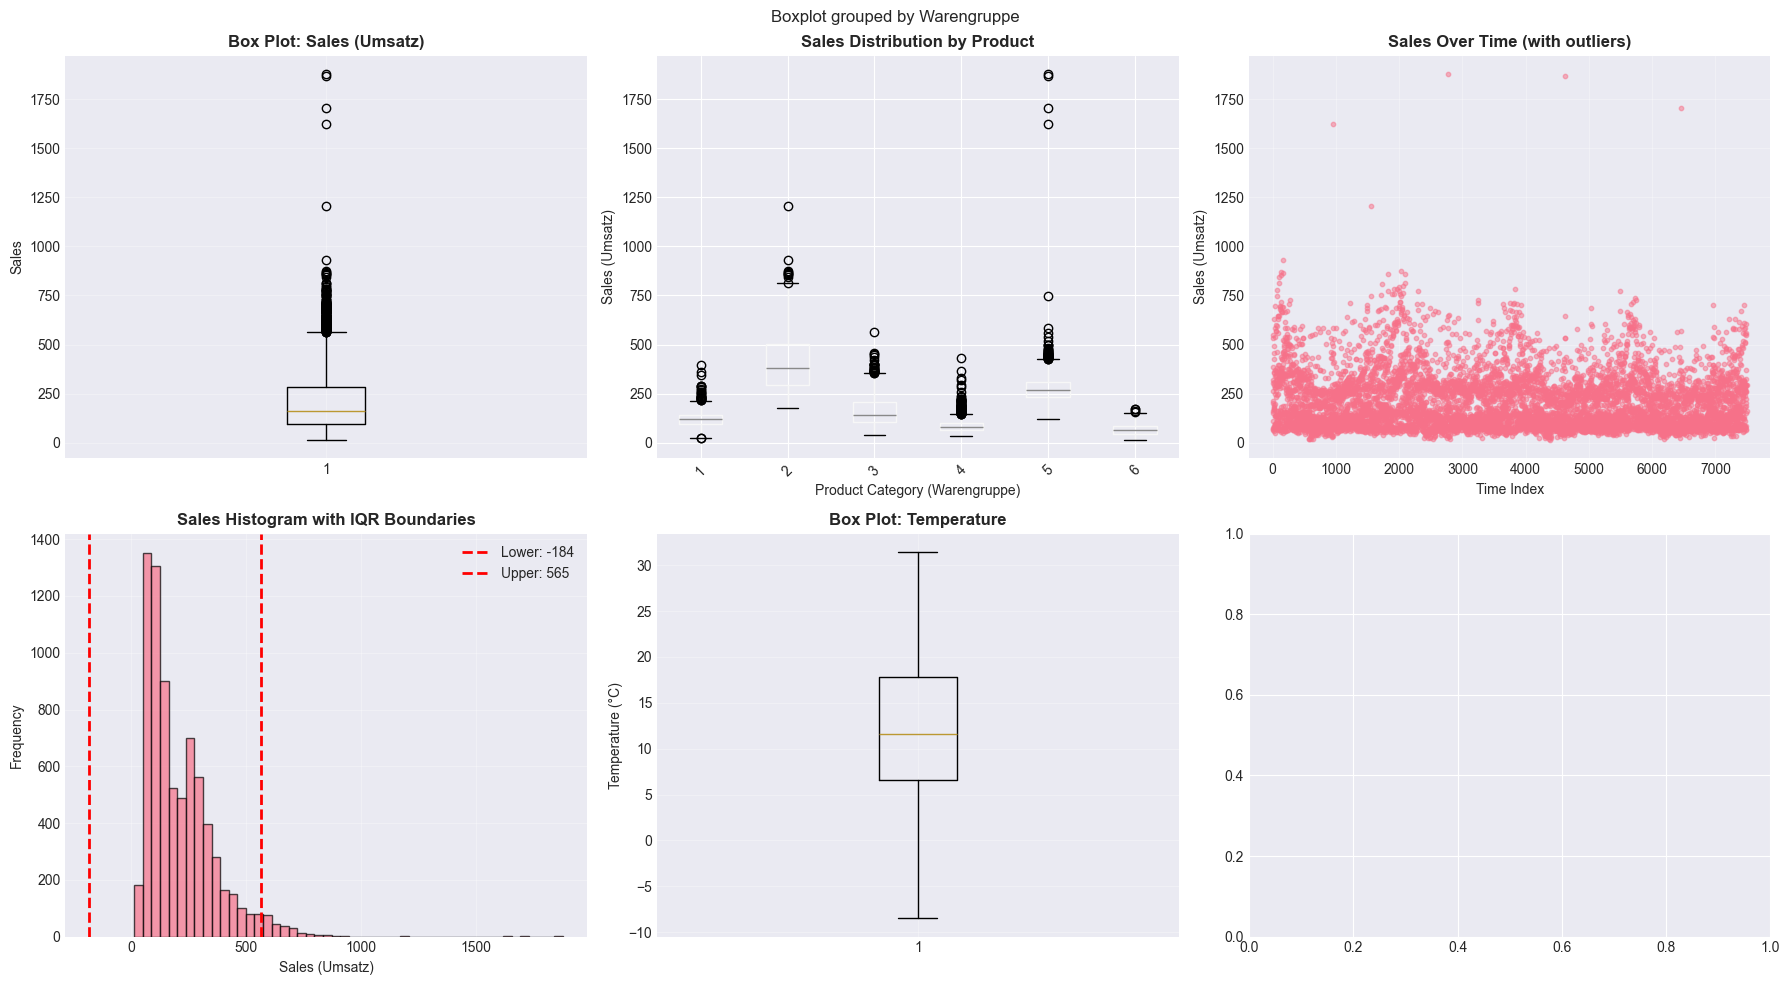

Outlier analysis saved as 'outlier_analysis.png'

EXTREME OUTLIERS IN SALES (Top 10 highest):
----------------------------------------------------------------------
     Datum  Warengruppe      Umsatz  KielerWoche Wochentag
2014-12-31            5 1879.461831          NaN Wednesday
2015-12-31            5 1869.937723          NaN  Thursday
2016-12-31            5 1705.144205          NaN  Saturday
2013-12-31            5 1625.690601          NaN   Tuesday
2014-05-05            2 1203.431130          NaN    Monday
2013-08-03            2  930.801703          NaN  Saturday
2014-08-09            2  874.906746          NaN  Saturday
2013-07-28            2  871.802546          NaN    Sunday
2013-08-04            2  862.752429          NaN    Sunday
2014-06-28            2  861.858617          1.0  Saturday

EXTREME OUTLIERS IN SALES (Top 10 lowest):
----------------------------------------------------------------------
     Datum  Warengruppe    Umsatz  KielerWoche Wochentag
2015-11-19    

In [13]:
# ============================================================================
# 6. OUTLIER DETECTION & ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("6. OUTLIER DETECTION & ANALYSIS")
print("=" * 70)

from scipy import stats

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method (FIXED)
def detect_outliers_zscore(data, column, threshold=3):
    # Work only with non-null values
    data_clean = data[data[column].notna()].copy()
    z_scores = np.abs(stats.zscore(data_clean[column]))
    outliers = data_clean[z_scores > threshold]
    return outliers

# Analyze outliers in key numerical features
numerical_cols = ['Umsatz', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung']
if 'Umsatz_MA7' in train.columns:
    numerical_cols.append('Umsatz_MA7')
if 'Umsatz_Lag1' in train.columns:
    numerical_cols.append('Umsatz_Lag1')

outlier_summary = []

for col in numerical_cols:
    if col in train.columns:
        # IQR method
        outliers_iqr, lower, upper = detect_outliers_iqr(train, col)
        n_outliers_iqr = len(outliers_iqr)
        pct_outliers_iqr = (n_outliers_iqr / len(train)) * 100
        
        # Z-score method
        outliers_zscore = detect_outliers_zscore(train, col)
        n_outliers_zscore = len(outliers_zscore)
        pct_outliers_zscore = (n_outliers_zscore / len(train)) * 100
        
        outlier_summary.append({
            'Feature': col,
            'IQR_Outliers': n_outliers_iqr,
            'IQR_Pct': f'{pct_outliers_iqr:.2f}%',
            'ZScore_Outliers': n_outliers_zscore,
            'ZScore_Pct': f'{pct_outliers_zscore:.2f}%',
            'Lower_Bound': f'{lower:.2f}',
            'Upper_Bound': f'{upper:.2f}'
        })

outlier_df = pd.DataFrame(outlier_summary)
print("\nOUTLIER DETECTION SUMMARY:")
print("-" * 70)
print(outlier_df.to_string(index=False))

# Visualize outliers for target variable (Umsatz)
print("\nCreating outlier visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Box plot for Umsatz
axes[0, 0].boxplot(train['Umsatz'].dropna(), vert=True)
axes[0, 0].set_title('Box Plot: Sales (Umsatz)', fontweight='bold')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].grid(alpha=0.3)

# 2. Box plot by product
train.boxplot(column='Umsatz', by='Warengruppe', ax=axes[0, 1])
axes[0, 1].set_title('Sales Distribution by Product', fontweight='bold')
axes[0, 1].set_xlabel('Product Category (Warengruppe)')
axes[0, 1].set_ylabel('Sales (Umsatz)')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# 3. Scatter plot: Umsatz over time
axes[0, 2].scatter(range(len(train)), train['Umsatz'], alpha=0.5, s=10)
axes[0, 2].set_title('Sales Over Time (with outliers)', fontweight='bold')
axes[0, 2].set_xlabel('Time Index')
axes[0, 2].set_ylabel('Sales (Umsatz)')
axes[0, 2].grid(alpha=0.3)

# 4. Histogram with outlier boundaries
outliers_umsatz, lower_umsatz, upper_umsatz = detect_outliers_iqr(train, 'Umsatz')
axes[1, 0].hist(train['Umsatz'], bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(lower_umsatz, color='red', linestyle='--', linewidth=2, label=f'Lower: {lower_umsatz:.0f}')
axes[1, 0].axvline(upper_umsatz, color='red', linestyle='--', linewidth=2, label=f'Upper: {upper_umsatz:.0f}')
axes[1, 0].set_title('Sales Histogram with IQR Boundaries', fontweight='bold')
axes[1, 0].set_xlabel('Sales (Umsatz)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 5. Temperature outliers
if 'Temperatur' in train.columns:
    outliers_temp, lower_temp, upper_temp = detect_outliers_iqr(train, 'Temperatur')
    axes[1, 1].boxplot(train['Temperatur'].dropna(), vert=True)
    axes[1, 1].set_title('Box Plot: Temperature', fontweight='bold')
    axes[1, 1].set_ylabel('Temperature (°C)')
    axes[1, 1].grid(alpha=0.3)

# 6. Sales by KielerWoche (special event analysis)
if 'KielerWoche' in train.columns:
    kiwo_0 = train[train['KielerWoche'] == 0]['Umsatz'].dropna()
    kiwo_1 = train[train['KielerWoche'] == 1]['Umsatz'].dropna()
    if len(kiwo_0) > 0 and len(kiwo_1) > 0:
        axes[1, 2].boxplot([kiwo_0, kiwo_1], labels=['Normal Days', 'Kieler Woche'])
        axes[1, 2].set_title('Sales: Normal vs Kieler Woche Event', fontweight='bold')
        axes[1, 2].set_ylabel('Sales (Umsatz)')
        axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Outlier analysis saved as 'outlier_analysis.png'")

# Identify extreme outliers in Umsatz
print("\nEXTREME OUTLIERS IN SALES (Top 10 highest):")
print("-" * 70)
top_outliers = train.nlargest(10, 'Umsatz')[['Datum', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Wochentag']]
print(top_outliers.to_string(index=False))

print("\nEXTREME OUTLIERS IN SALES (Top 10 lowest):")
print("-" * 70)
bottom_outliers = train.nsmallest(10, 'Umsatz')[['Datum', 'Warengruppe', 'Umsatz', 'KielerWoche', 'Wochentag']]
print(bottom_outliers.to_string(index=False))

# Summary statistics
print("\n" + "=" * 70)
print("OUTLIER ANALYSIS SUMMARY")
print("=" * 70)
print(f"Total Sales Outliers (IQR method): {len(outliers_umsatz)} ({len(outliers_umsatz)/len(train)*100:.2f}%)")
print(f"These outliers may represent:")
print("  - Special events (Kieler Woche)")
print("  - Holidays or weekends")
print("  - Extreme weather conditions")
print("  - Data entry errors")
# print("\nRecommendation: Keep outliers for now - they may contain valuable patterns!")

print("\n" + "=" * 70)
print("DATASET CHARACTERISTICS ANALYSIS COMPLETE!")
print("=" * 70)